<a href="https://colab.research.google.com/github/Bloodflake/Mnist-digit-recognization/blob/master/mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [ ]:
tf.__version__

'2.3.0'

# ***creating the model***

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() #Loading the dataset

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Preprocessing of data
x_train = x_train/255.0 #normalizing the pixel value b/w 0 to 255
x_test =x_test/255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

3


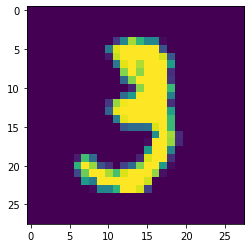

In [ ]:
i = 10
print(y_train[i])
plt.imshow(x_train[i])
plt.show()

In [ ]:
#@title  DNN architecture
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024,activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(256,activation=tf.nn.relu),  
        tf.keras.layers.Dropout(0.4),                     
        tf.keras.layers.Dense(128,activation=tf.nn.relu),                        
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]) 

In [ ]:
model.build((None,28,28))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3181 - accuracy: 0.9035
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1697 - accuracy: 0.9523
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1357 - accuracy: 0.9621
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1237 - accuracy: 0.9665
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1090 - accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1007 - accuracy: 0.9722
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0894 - accuracy: 0.9764
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0877 - accuracy: 0.9761
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9789
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.075

In [ ]:
evalhist = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9794


In [ ]:
print("loss on test set : ",evalhist[0])

loss on test set :  0.08540818840265274


In [ ]:
print("accuracy on test set : ",evalhist[1])

accuracy on test set :  0.9793999791145325


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
p = [np.argmax(i) for i in y_pred]

In [ ]:
print(confusion_matrix(y_true = y_test,y_pred = p))

[[ 972    1    0    0    1    0    2    1    3    0]
 [   0 1127    0    0    0    0    2    1    5    0]
 [   4    3 1013    2    2    0    1    5    2    0]
 [   1    0    6  992    0    2    0    4    5    0]
 [   1    1    1    0  959    0    6    1    1   12]
 [   6    0    0   12    1  858    4    1    5    5]
 [   6    3    0    0    2    9  936    0    2    0]
 [   2    2    7    1    0    0    0 1010    2    4]
 [   3    1    7    2    5    7    0    4  943    2]
 [   5    3    0    3    4    2    0    3    5  984]]


In [ ]:
print(classification_report(y_true = y_test,y_pred = p))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

